In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(550068, 12)

In [4]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
print('Product_Category_2 missing values percentage: ', data['Product_Category_2'].isnull().sum()/data.shape[0]*100)
print('Product_Category_3 missing values percentage: ', data['Product_Category_3'].isnull().sum()/data.shape[0]*100)

Product_Category_2 missing values percentage:  31.56664266963357
Product_Category_3 missing values percentage:  69.67265865311198


In [7]:
data = data.fillna(0)

In [8]:
print(set(data.Gender))
print(set(data.Age))
print(set(data.City_Category))
print(set(data.Stay_In_Current_City_Years))

{'F', 'M'}
{'46-50', '26-35', '55+', '0-17', '51-55', '18-25', '36-45'}
{'A', 'B', 'C'}
{'4+', '0', '3', '2', '1'}


In [9]:
data.Gender = data.Gender.apply(lambda gender: 1 if gender == 'M' else 0)
data.City_Category = data.City_Category.apply(lambda city: 0 if city == 'A' else 1 if city == 'B' else 2)
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.apply(lambda year: 4 if year == '4+' else int(year))
data.Age = data.Age.apply(lambda age: 0 if age == '0-17' else 1 if age == '18-25' else 2 if age == '26-35' 
               else 3 if age == '36-45' else 4 if age == '46-50' else 5 if age == '51-55' else 6)

In [10]:
print(data.Gender.value_counts())
print(data.Age.value_counts())
print(data.City_Category.value_counts())
print(data.Stay_In_Current_City_Years.value_counts())

1    414259
0    135809
Name: Gender, dtype: int64
2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64
1    231173
2    171175
0    147720
Name: City_Category, dtype: int64
1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64


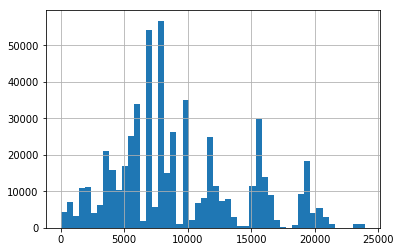

In [11]:
data.Purchase.hist(bins=50)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


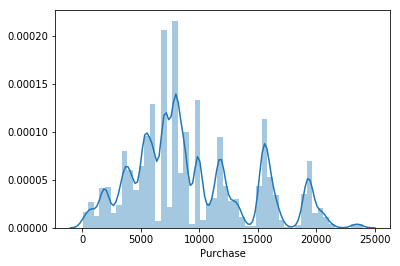

In [12]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data.Purchase, bins=50)
plt.show()

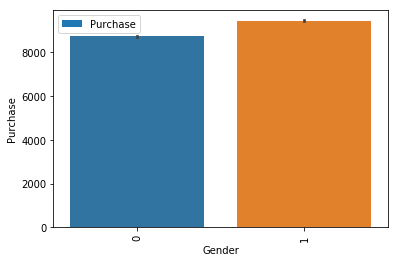

In [13]:
data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = data)
plt.show()

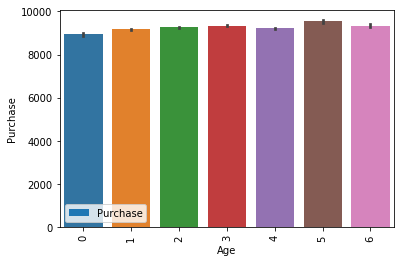

In [14]:
data[['Age','Purchase']].groupby('Age').mean().plot.bar()
sns.barplot('Age', 'Purchase', data = data)
plt.show()

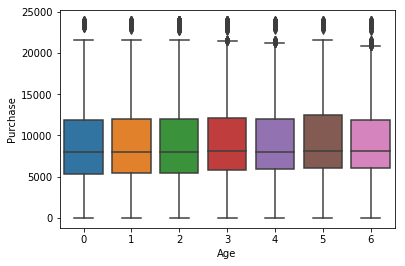

In [15]:
sns.boxplot('Age','Purchase', data = data)
plt.show()

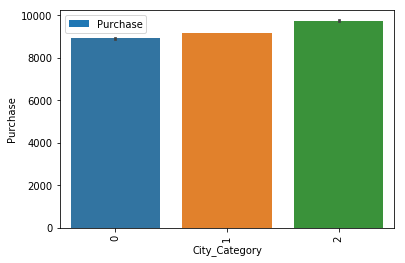

In [16]:
data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar()
sns.barplot('City_Category', 'Purchase', data = data)
plt.show()

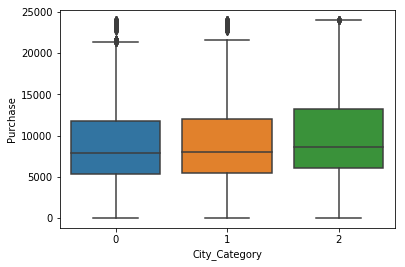

In [17]:
sns.boxplot('City_Category','Purchase', data = data)
plt.show()

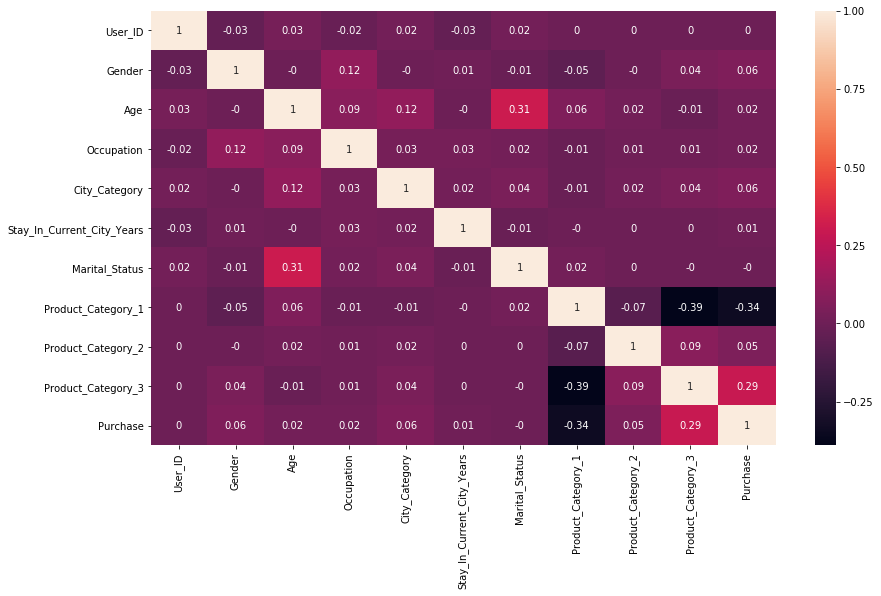

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [19]:
X = data.drop(['Purchase'], axis=1)
X = data.drop(['User_ID','Product_ID'], axis=1)
y = data.Purchase

In [20]:
from sklearn.feature_selection import f_regression, SelectKBest
X_Selected = SelectKBest(f_regression, k=4).fit_transform(X, y)
X_Selected = pd.DataFrame(data = X_Selected)

In [21]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10).split(range(X_Selected.shape[0]))

for train, test in kf:
    X_train, X_test = X_Selected.iloc[train, :], X_Selected.iloc[test, :]
    y_train, y_test = y[train], y[test]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

lr_fit = lr.fit(X_train, y_train)
dtr_fit = dtr.fit(X_train, y_train)
rfr_fit = rfr.fit(X_train, y_train)
gbr_fit = gbr.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
from sklearn import metrics

print('Accuracy of Linear regression on train set', lr_fit.score(X_train, y_train)*100)
print('Accuracy of Decision Tree on train set', dtr_fit.score(X_train, y_train)*100)
print('Accuracy of Random Forests on train set', rfr_fit.score(X_train, y_train)*100)
print('Accuracy of Gradient Boosting on train set', gbr_fit.score(X_train, y_train)*100)

Accuracy of Linear regression on train set 100.0
Accuracy of Decision Tree on train set 100.0
Accuracy of Random Forests on train set 99.99999998267887
Accuracy of Gradient Boosting on train set 99.99650852129244


In [24]:
print('Accuracy of Linear regression on test set', lr_fit.score(X_test, y_test)*100)
print('Accuracy Score of Decision Tree on test set', dtr_fit.score(X_test, y_test)*100)
print('Accuracy of Random Forests on test set', rfr_fit.score(X_test, y_test)*100)
print('Accuracy of Gradient Boosting on testset', gbr_fit.score(X_test, y_test)*100)

Accuracy of Linear regression on test set 100.0
Accuracy Score of Decision Tree on test set 99.99746347869603
Accuracy of Random Forests on test set 99.99746358434868
Accuracy of Gradient Boosting on testset 99.99202223828023


In [25]:
print('RMSE of Linear regression on test set', np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))
print('RMSE of Decision Tree on test set', np.sqrt(metrics.mean_squared_error(y_test, dtr.predict(X_test))))
print('RMSE of Random Forests on test set', np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))))
print('RMSE of Gradient Boosting on test set', np.sqrt(metrics.mean_squared_error(y_test, gbr.predict(X_test))))

RMSE of Linear regression on test set 1.0779005116737127e-11
RMSE of Decision Tree on test set 26.97078738182818
RMSE of Random Forests on test set 26.970225674574873
RMSE of Gradient Boosting on test set 47.831598898699745


In [91]:
'''X = data.drop(['Purchase'], axis=1)
from sklearn.preprocessing import LabelEncoder #Now let's import encoder from sklearn library
LE = LabelEncoder()
#Now we will encode the data into labels using label encoder for easy computing
X = X.apply(LE.fit_transform) #Here we applied encoder onto data
X.Gender = pd.to_numeric(X.Gender)
X.Age = pd.to_numeric(X.Age)
X.Occupation = pd.to_numeric(X.Occupation)
X.City_Category = pd.to_numeric(X.City_Category)
X.Stay_In_Current_City_Years = pd.to_numeric(X.Stay_In_Current_City_Years)
X.Marital_Status = pd.to_numeric(X.Marital_Status)
X.Product_Category_1 = pd.to_numeric(X.Product_Category_1)
X.Product_Category_2 = pd.to_numeric(X.Product_Category_2)
X.Product_Category_3 = pd.to_numeric(X.Product_Category_3)'''

In [92]:
'''Y = data['Purchase'] #Here we will made a array named as Y consisting of data from purchase column
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
#Standardize features by removing the mean and scaling to unit variance Centering and scaling happen 
#independently on each feature by computing the relevant statistics on the samples in the training set. 
#Mean and standard deviation are then stored to be used on later data using the transform method.
Xs = SS.fit_transform(X)
#You must to transform X into numeric representation (not necessary binary).
#Because all machine learning methods operate on matrices of number
from sklearn.decomposition import PCA
pc = PCA(4)#here 4 indicates the number of components you want it into.
principalComponents = pc.fit_transform(X)#Here we are applying PCA to data/fitting data to PCA
pc.explained_variance_ratio_
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])'''

{'0', '1', '2', '3', '4+'}